In [16]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Amit kumar
[nltk_data]     guru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df = pd.read_csv('spam.csv', sep=',', encoding='latin-1')

In [18]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5354,ham,Aiyo cos i sms Ì_ then Ì_ neva reply so i wait...,NaN,NaN,NaN
4410,ham,Ya but it cant display internal subs so i gott...,NaN,NaN,NaN
1829,spam,Hottest pics straight to your phone!! See me g...,NaN,NaN,NaN
1894,spam,"FreeMsg Hey U, i just got 1 of these video/pic...",NaN,NaN,NaN
1624,spam,500 free text msgs. Just text ok to 80488 and ...,NaN,NaN,NaN


In [19]:
df.shape

(5572, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [22]:
df.sample(5)

,v1,v2
3357,ham,I don't run away frm u... I walk slowly &amp; ...
4756,ham,"hey, looks like I was wrong and one of the kap..."
2635,ham,Tiwary to rcb.battle between bang and kochi.
554,ham,IÛ÷ll have a look at the frying pan in case i...
2589,spam,Join the UK's horniest Dogging service and u c...


In [23]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2057,ham,"Nothing, i got msg frm tht unknown no.."
87,ham,Yes I started to send requests to make it but ...
3285,ham,Not to worry. I'm sure you'll get it.
2207,ham,Usually the body takes care of it buy making s...
2626,ham,Unni thank you dear for the recharge..Rakhesh


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['target'] = encoder.fit_transform(df['target'])

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [29]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.shape

(5169, 2)

## 2.EDA

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

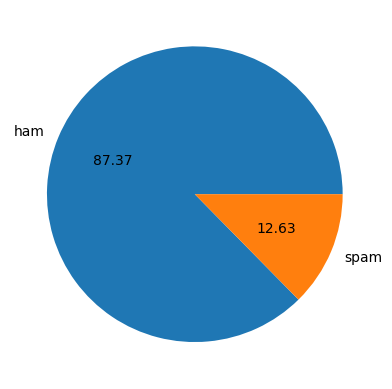

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [34]:
# Data is imbalanced

In [35]:
import nltk

In [ ]:
!pip install nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Amit kumar
[nltk_data]     guru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [53]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to C:\Users\Amit kumar
[nltk_data]     guru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [54]:
df['num_characters'] = df['text'].apply(len)

In [55]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [57]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [58]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [59]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [81]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [82]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [83]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [84]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

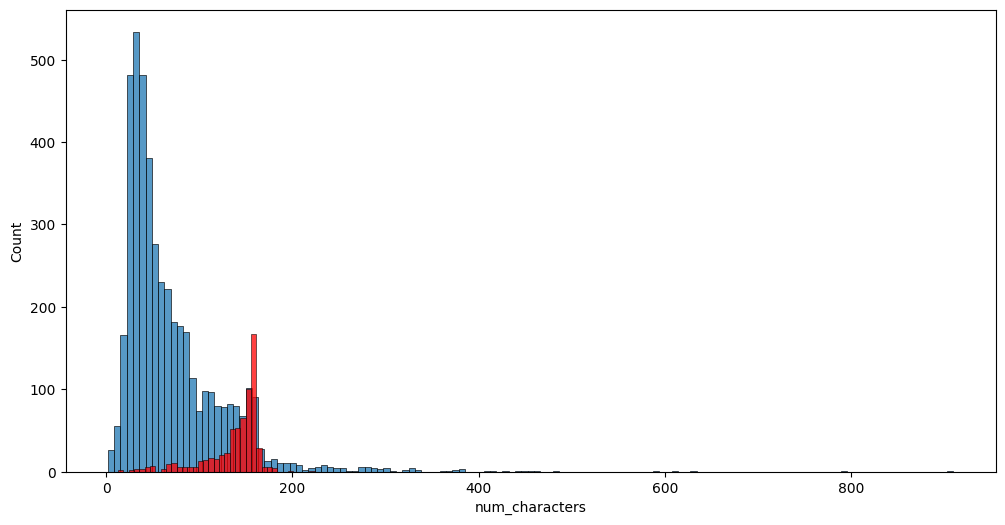

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

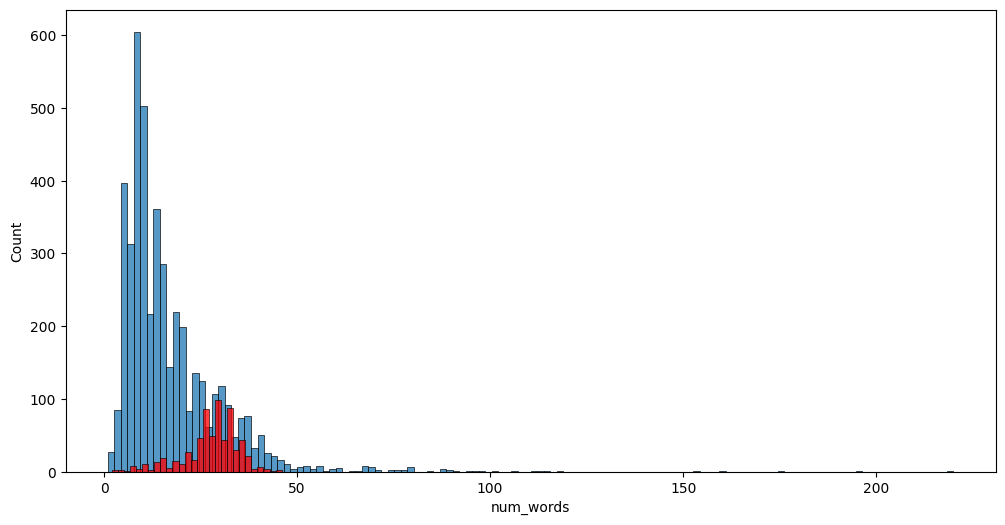

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

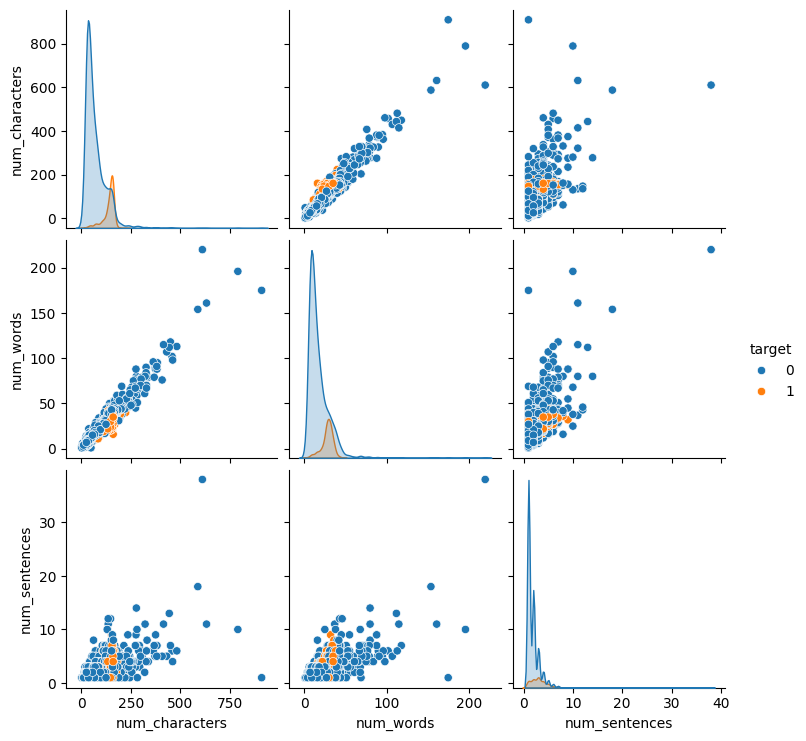

In [87]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [113]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.tokenize import word_tokenize

In [128]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(lemmatizer.lemmatize(i))


   
    
            
    return " ".join(y)

In [129]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [130]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [103]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [131]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [132]:
df['transformed_text'] = df['text'].apply(transform_text)

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [134]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [135]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

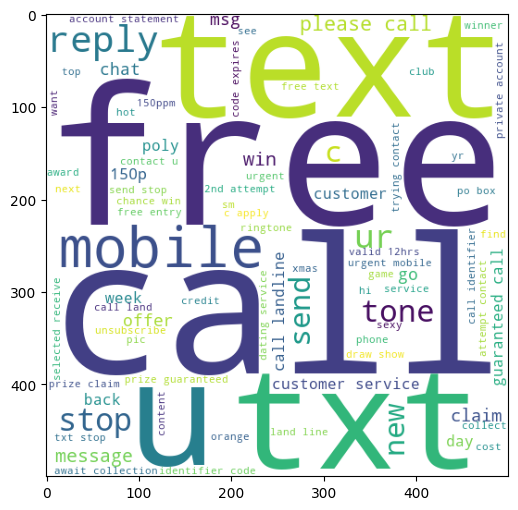

In [136]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [137]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

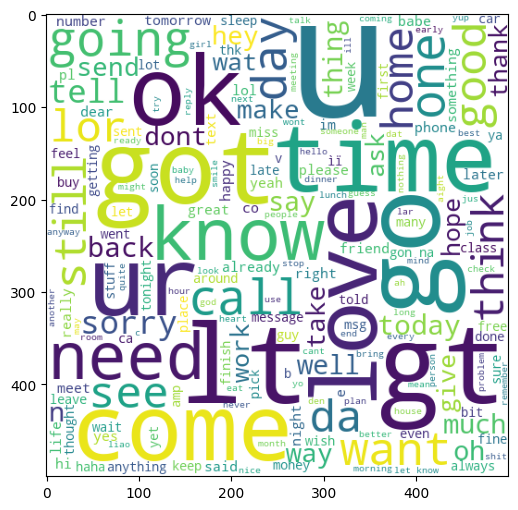

In [138]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [139]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [140]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [151]:
len(spam_corpus)

9939

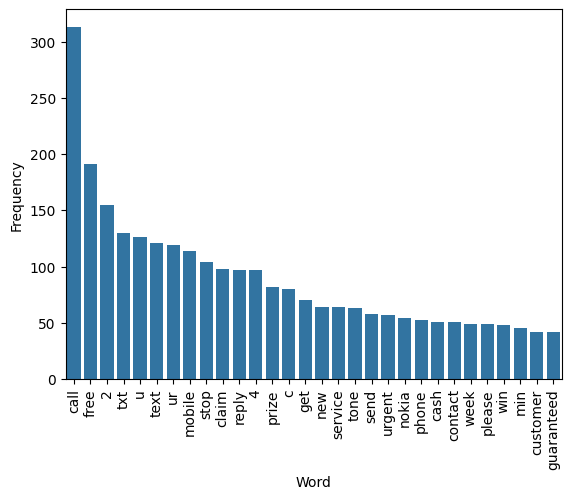

In [164]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the word counts
df_word = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=df_word)
plt.xticks(rotation='vertical')
plt.show()

In [163]:
df_word

,Word,Frequency
0,call,313
1,free,191
2,2,155
3,txt,130
4,u,126
5,text,121
6,ur,119
7,mobile,114
8,stop,104
9,claim,98


In [165]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [166]:
len(ham_corpus)

35404

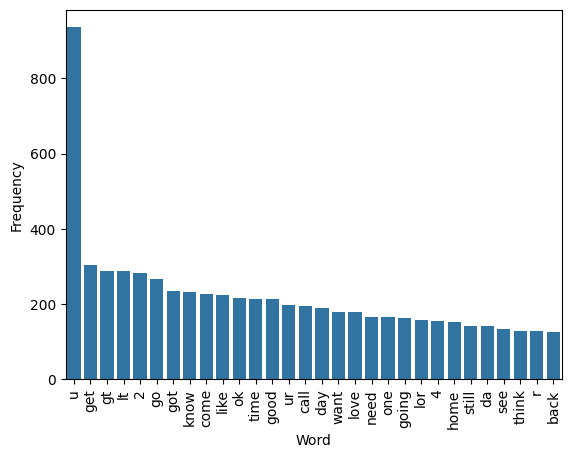

In [167]:


from collections import Counter
word_counts = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the word counts
df_word1 = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=df_word1)
plt.xticks(rotation='vertical')
plt.show()

In [168]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


## 4. Model Building

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [198]:
X = df['transformed_text'].values

In [199]:
X

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       'free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18',
       ..., 'pity mood suggestion',
       'guy bitching acted like interested buying something else next week gave u free',
       'rofl true name'], dtype=object)

In [470]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [483]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [200]:
X.shape

(5169,)

In [201]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [194]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [202]:
len(X_train),len(y_train)

(4135, 4135)

In [184]:
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [185]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [186]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [187]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8945841392649904
[[807  89]
 [ 20 118]]
0.5700483091787439


In [188]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[888   8]
 [ 16 122]]
0.9384615384615385


In [189]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9642166344294004
[[896   0]
 [ 37 101]]
1.0


In [493]:
# tfidf --> MNB

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=3000)
X_train=tv.fit_transform(X_train).toarray()
X_test=tv.transform(X_test).toarray()

In [205]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [206]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [207]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8578336557059961
[[770 126]
 [ 21 117]]
0.48148148148148145


In [208]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [209]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[896   0]
 [ 18 120]]
1.0


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [211]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [212]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [213]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [214]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9669421487603306))

In [215]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8762886597938144
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828


d:\SMS SPAM\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.940677966101695
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8809523809523809
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.912621359223301
For  xgb
Accuracy -  0.971953578336557
Precision -  0.957983193277311


In [216]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [217]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.970019,1.000000
8,ETC,0.978723,0.975410
5,RF,0.972921,0.974138
0,SVC,0.975822,0.966942
10,xgb,0.971954,0.957983
6,AdaBoost,0.967118,0.940678
4,LR,0.952611,0.923810
9,GBDT,0.948743,0.912621
7,BgC,0.959381,0.880952


In [218]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [219]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.970019
2,ETC,Accuracy,0.978723
3,RF,Accuracy,0.972921
4,SVC,Accuracy,0.975822
5,xgb,Accuracy,0.971954
6,AdaBoost,Accuracy,0.967118
7,LR,Accuracy,0.952611
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.959381


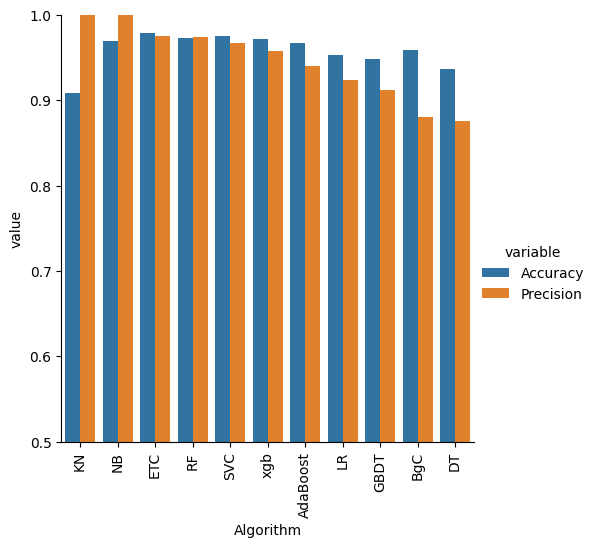

In [220]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [221]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [222]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [223]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [224]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [225]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [226]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
2,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
3,RF,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
4,SVC,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
5,xgb,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983
6,AdaBoost,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678
7,LR,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
8,GBDT,0.948743,0.912621,0.948743,0.912621,0.948743,0.912621,0.948743,0.912621
9,BgC,0.959381,0.880952,0.959381,0.880952,0.959381,0.880952,0.959381,0.880952


In [227]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [228]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [229]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [230]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9916666666666667


In [231]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [232]:
from sklearn.ensemble import StackingClassifier

In [233]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [234]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9609375


In [235]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))